In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier

In [2]:
url='https://raw.githubusercontent.com/ShaiYona/Data-Science2021B/main/Assignments/4/nba.csv'
basketball=pd.read_csv(url)
basketball.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


.reset_index()=כאשר אני מסיר ערך ואני רוצה שאינדקסים המספריים ישמרו אני אשתמש בזה לדוג הורדתי את השורה השלישית ואני רוצה שדאטה תמשיך להיות לפי הסדר מספרי ולא יהיה דילוג של אחד שתיים ואז ארבע נשתמש בזה 

value_counts()=  מסדר לי את האובייקט מהגדול לקטן כאשר בתוך הסוגריים כתוב 

הוא ממיין מהקטן לגדולsort=False 

אם אני לוחץ שיפט טאב על הפונקציות עצמם אני מקבל רשימה של הדברים שאני יכול לעשות עם הפונקציות

## פונקציות בסיסיות

In [3]:
#היה לי בעיה עם העמודה של הגובה השתמשתי בפונקציה שמקבלת 2 ערכים ערך הראשון זה מה שאני רוצה להחליף ערך שני זה למה אני רוצה להחליף
basketball['Height'] = basketball['Height'].str.replace('-', '.')
basketball.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6.2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6.6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6.5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6.5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6.10,231.0,NaN,5000000.0


In [4]:
#מס שורות בדאטה
print(len(basketball))

458


In [5]:
#הצגת 5 שורות ראשונות בקובץ
basketball.head()
#הצגת 5 שורות אחרונות בקובץ
basketball.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6.3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6.1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7.3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7.0,231.0,Kansas,947276.0
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#סופר את מס הערכים שיש לי בכל עמודה
basketball.count()
#ממוצע
basketball.mean()
#חציון
basketball.median()
#ערך מקסימלי
basketball.max()
#ערך מינמלי
basketball.min()
#סטיית תקן
basketball.std()

Number    1.596609e+01
Age       4.404016e+00
Weight    2.636834e+01
Salary    5.229238e+06
dtype: float64

In [7]:
#שתי דרכים לקרוא לשורה מסוימת בתוך קובץ
basketball['Team'][25]
basketball.Team[25]

'Brooklyn Nets'

In [8]:
#כאשר אני רוצה לבחור שורה מסוימת בתוך הטבלה
#נקודתיים זה טווח ופסיק מפריד בין שורות לעמודות שורות זה ראשון
basketball.iloc[0:3,0:3]
#בחירת שורות ועמודות ספציפיות
basketball.iloc[[0,3,5],[3,5,7]]

,Position,Height,College
0,PG,6.2,Texas
3,SG,6.5,Georgia State
5,PF,6.9,NaN


In [9]:
#לקרוא לשורות ביחס לעמודות
basketball.loc[:,['Height']]
#כאשר אני רוצה לגשת לערך ספציפי בעמודה מסוימת
#כאשר אני רוצה לגשת לערך מסוים בעמודה שיש לי אני מפעיל את הפונקציה על העמודה ומשווה עם מה שאני רוצה לקבל
a=basketball[basketball.loc[:,'Team']== 'Utah Jazz']
a 

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
442,Trevor Booker,Utah Jazz,33.0,PF,28.0,6.8,228.0,Clemson,4775000.0
443,Trey Burke,Utah Jazz,3.0,PG,23.0,6.1,191.0,Michigan,2658240.0
444,Alec Burks,Utah Jazz,10.0,SG,24.0,6.6,214.0,Colorado,9463484.0
445,Dante Exum,Utah Jazz,11.0,PG,20.0,6.6,190.0,NaN,3777720.0
446,Derrick Favors,Utah Jazz,15.0,PF,24.0,6.10,265.0,Georgia Tech,12000000.0
447,Rudy Gobert,Utah Jazz,27.0,C,23.0,7.1,245.0,NaN,1175880.0
448,Gordon Hayward,Utah Jazz,20.0,SF,26.0,6.8,226.0,Butler,15409570.0
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6.8,206.0,Duke,1348440.0
450,Joe Ingles,Utah Jazz,2.0,SF,28.0,6.8,226.0,NaN,2050000.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6.6,206.0,Dayton,981348.0


In [10]:
#הסימן אומר או שייקח את 2 התנאים שיש כאן 
x=basketball[(basketball['Team'] == 'Utah Jazz') | (basketball['Team']=='Boston Celtics')]
x
#הסימן אומר וגם שחייב שיתקיימו שתי התנאים יחדיו
b=basketball[(basketball['Team'] == 'Utah Jazz') & (basketball['Position']=='SF')]
b

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
448,Gordon Hayward,Utah Jazz,20.0,SF,26.0,6.8,226.0,Butler,15409570.0
450,Joe Ingles,Utah Jazz,2.0,SF,28.0,6.8,226.0,NaN,2050000.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6.6,206.0,Dayton,981348.0


# ערכים חסרים 
כאשר אני ממלא ערכים חסרים אני חייב לשים את זה בשם משתנה אחרת זה לא ישמר לי או לכתוב

inplace=True

In [11]:
#מציאת ערכים חסרים וסכימה שלהם
basketball.isnull().sum()
#בדיקה בעמודה מסוימת כמה ערכים שהם לא חסרים יש
basketball['Name'].notnull().sum()
#הסרת  ערכים חסרים
# מסיר את כל הערכים החסרים בקובץ
basketball_dro=basketball.dropna()
# לברר מה זה עושה בדיוק
basketball.dropna(subset =['Name']).count()
#הורדת ערך חסר אם יש לי יותר מ3 ערכים חסרים בשורה אני יכול לקבוע את המספר 
basketball.dropna(thresh=3)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6.2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6.6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6.5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6.5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6.10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6.10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6.3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6.1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7.3,256.0,NaN,2900000.0


In [12]:
#מילוי ערכים חסרים 
#הדיפולט זה לא נכון כאשר אני משנה את זה לנכון זה נשאר ובכל מקום שיש לי ערך חסר ממלא לי 0
#basketball.fillna(0 , inplace = True)
#נגיד 59 זה ערך חסר אז הוא ימלא את זה בערך האחרון שהוא לא חסר לדוג ב58 אם הוא לא חסר
basketball[['College']].fillna(method='ffill')
#בדיוק הפוך ממלא את הערך החסר בערך הראשון שאחרי הערך החסר
basketball[['College']].fillna(method='bfill')
#מילוי ערכים חסרים בצורה לינארית
basketball['Salary'] = basketball[['Salary']].interpolate(method ='linear') 
basketball

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6.2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6.6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6.5,205.0,Boston University,3972378.5
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6.5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6.10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6.3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6.1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7.3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7.0,231.0,Kansas,947276.0


# pivot_table ,groupby , sort_values ,sort_index,

# get_dummies, cat.code, str.contains, cut

In [13]:
#כאשר אני לא כותב כלום הברירת מחדל זה ממוצע כאשר אני כותה בצורה הזאת אפשר להכניס  ערכים שהם לא מספריים גם
#הפונקציה ראונד מעגלת את המספרים העשרוניים
basketball.pivot_table(index = ['Position','Weight'], values =['Salary'] , aggfunc = sum).round(1)


Salary
Position Weight            
C        220.0    3551719.0
         225.0     947276.0
         231.0     947276.0
         232.0   13400000.0
         235.0    6362796.0
...                     ...
SG       222.0    1100000.0
         225.0    6472369.0
         228.0    1449000.0
         230.0    4500000.0
         234.0   14700000.0

[149 rows x 1 columns]

In [14]:
#דבר ראשון הוספת עמודה חדשה לדאטה
#בעזרת הפונקציה אני אומר לו קח את הקבוצות לפי השמות של השחקנים ועליהם תוסיף את הערכים החסרים
#unit4
basketball["aviel"]=basketball.groupby("Name")[["College"]].apply(lambda x: x.fillna(method="bfill"))
basketball.iloc[0:12,]


,Name,Team,Number,Position,Age,Height,Weight,College,Salary,aviel
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6.2,180.0,Texas,7730337.0,Texas
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6.6,235.0,Marquette,6796117.0,Marquette
2,John Holland,Boston Celtics,30.0,SG,27.0,6.5,205.0,Boston University,3972378.5,Boston University
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6.5,185.0,Georgia State,1148640.0,Georgia State
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6.10,231.0,NaN,5000000.0,NaN
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6.9,240.0,NaN,12000000.0,NaN
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6.8,235.0,LSU,1170960.0,LSU
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7.0,238.0,Gonzaga,2165160.0,Gonzaga
8,Terry Rozier,Boston Celtics,12.0,PG,22.0,6.2,190.0,Louisville,1824360.0,Louisville
9,Marcus Smart,Boston Celtics,36.0,PG,22.0,6.4,220.0,Oklahoma State,3431040.0,Oklahoma State


In [15]:
#ממיין את העמודה שביקשתי מהקטן לגדול זו הברירת מחדל במקרה שלנו כאשר הוספתי את אקסידנג זה הפוך וממין מהגדול לקטן 
basketball.sort_values(by='Weight', ascending = False).head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary,aviel
405,Nikola Pekovic,Minnesota Timberwolves,14.0,C,30.0,6.11,307.0,NaN,12100000.0,NaN
302,Boban Marjanovic,San Antonio Spurs,40.0,C,27.0,7.3,290.0,NaN,1200000.0,NaN
330,Al Jefferson,Charlotte Hornets,25.0,C,31.0,6.10,289.0,NaN,13500000.0,NaN
395,Jusuf Nurkic,Denver Nuggets,23.0,C,21.0,7.0,280.0,NaN,1842000.0,NaN
188,Andre Drummond,Detroit Pistons,0.0,C,22.0,6.11,279.0,Connecticut,3272091.0,Connecticut


In [16]:
#ממיין את האינדקסים מהקטן לגדול אם במקום נכון אכתוב לא נכון אראה את הכול מהגדול לקטן
basketball.sort_index(ascending=True)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,aviel
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6.2,180.0,Texas,7730337.0,Texas
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6.6,235.0,Marquette,6796117.0,Marquette
2,John Holland,Boston Celtics,30.0,SG,27.0,6.5,205.0,Boston University,3972378.5,Boston University
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6.5,185.0,Georgia State,1148640.0,Georgia State
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6.10,231.0,NaN,5000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6.3,203.0,Butler,2433333.0,Butler
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6.1,179.0,NaN,900000.0,NaN
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7.3,256.0,NaN,2900000.0,NaN
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7.0,231.0,Kansas,947276.0,Kansas


In [17]:
#הפונקציה הופכת ערך קטגורי לבינארי היא לוקחת את כל הערכים בעמודה הקטגורית והופכת כל אחד מהם לעמודה נפרדת שבה הוא מקבל או אפס או 1
#שמתי כאן גם ערך מספרי כדי להראות שהוא לא משתנה בכלל רק ערך קטגורי
features2=['Position','Age']
basketball_get = pd.get_dummies(basketball[features2])
basketball_get

,Age,Position_C,Position_PF,Position_PG,Position_SF,Position_SG
0,25.0,0,0,1,0,0
1,25.0,0,0,0,1,0
2,27.0,0,0,0,0,1
3,22.0,0,0,0,0,1
4,29.0,0,1,0,0,0
...,...,...,...,...,...,...
453,26.0,0,0,1,0,0
454,24.0,0,0,1,0,0
455,26.0,1,0,0,0,0
456,26.0,1,0,0,0,0


In [18]:
#הופך לי ערך קטגורי לערך מספרי באותה עמודה
#basketball['Position'] = basketball['Position'].astype('category').cat.codes
basketball.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,aviel
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6.3,203.0,Butler,2433333.0,Butler
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6.1,179.0,NaN,900000.0,NaN
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7.3,256.0,NaN,2900000.0,NaN
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7.0,231.0,Kansas,947276.0,Kansas
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,947276.0,NaN


In [19]:
#בשביל להשתמש בפונקציה אסור שיהיה ערכים חסרים
#מחפש בתוך העמודה של הקבוצות אם קיים את הקבוצה לוס אנגלס ואם כן היא מציגה לי את זה 
#הפונקציה מקבלת רק סטרינגים
basketball1=basketball.dropna()
basketball1[basketball1['Team'].str.contains("Los Angeles")]
#מציג לי 2 תנאים ביחד
basketball1[(basketball1['Position'].str.contains("SF")) & (basketball1['College'].str.contains("Kansas"))]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,aviel
87,Brandon Rush,Golden State Warriors,4.0,SF,30.0,6.6,220.0,Kansas,1270964.0,Kansas
101,Paul Pierce,Los Angeles Clippers,34.0,SF,38.0,6.7,235.0,Kansas,3376000.0,Kansas
243,Michael Beasley,Houston Rockets,8.0,SF,27.0,6.10,235.0,Kansas State,306527.0,Kansas State
377,Kelly Oubre Jr.,Washington Wizards,12.0,SF,20.0,6.7,205.0,Kansas,1920240.0,Kansas


In [20]:
#כדי שנוכל להשתמש בפונקציית חיפוש נצטרך להמיר קודם ערך שהוא מספרי למחרוזת ורק אז נוכל להשתמש  
#בגדול במקרה שזה מספרי לא נצטרך להשתמש בפונקציה הזאת אלא נשתמש בשווה שווה
basketball_=basketball1['Age']=basketball1['Age'].astype('str').copy()
basketball1[basketball1['Age'].str.contains("34")]

<ipython-input-20-b99ab3fe65bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basketball_=basketball1['Age']=basketball1['Age'].astype('str').copy()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary,aviel
258,Tony Allen,Memphis Grizzlies,9.0,SG,34.0,6.4,213.0,Oklahoma State,5158539.0,Oklahoma State
271,Zach Randolph,Memphis Grizzlies,50.0,PF,34.0,6.9,260.0,Michigan State,9638555.0,Michigan State
344,Joe Johnson,Miami Heat,2.0,SF,34.0,6.7,240.0,Arkansas,261894.0,Arkansas
349,Dwyane Wade,Miami Heat,3.0,SG,34.0,6.4,220.0,Marquette,20000000.0,Marquette
372,Drew Gooden,Washington Wizards,90.0,PF,34.0,6.10,250.0,Kansas,3300000.0,Kansas
394,Jameer Nelson,Denver Nuggets,1.0,PG,34.0,6.0,190.0,Saint Joseph's,4345000.0,Saint Joseph's
434,Chris Kaman,Portland Trail Blazers,35.0,C,34.0,7.0,265.0,Central Michigan,5016000.0,Central Michigan


In [21]:
#הפונקציה בעצם נותנת לי טווח של דברים לדוגמא הגילאים היא מפרידה לי אותם ל2 חלקים
age1 = pd.cut(basketball['Age'], [25, 30, 45])
#כאן אני עושה ממוצע של השכר לפני טווח גילאים של כל תפקיד במגרש
basketball.pivot_table('Salary', [ age1], 'Position')

Position,C,PF,PG,SF,SG
Age,,,,,
"(25, 30]",5.928470e+06,6.600630e+06,6.807734e+06,5.763945e+06,6.919113e+06
"(30, 45]",7.981658e+06,5.218010e+06,4.989297e+06,7.449592e+06,4.027442e+06


## איסטוגרמות

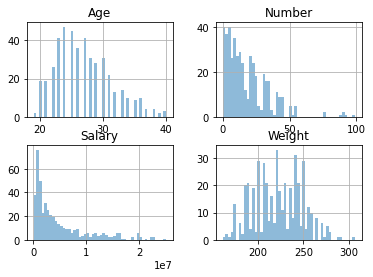

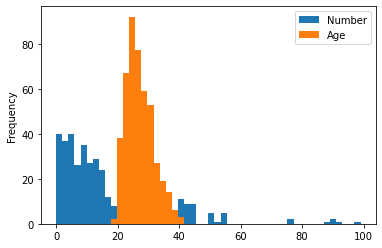

In [22]:
#מס 50 מייצג את כמות הערכים שאני רוצה להציג
#0.7 מייצג את הבהירות שלהגרף
basketball.hist(bins=50,alpha=0.5)
#מקבל גרף של 2 העמודות יחדיו
basketball[['Number','Age']].plot.hist(bins=50)


#countplot=כותבים רק בציר אחד בציר איקס הוא נותן את הערכים ובציר ווי את מס מופעים

#barplot=כותבים גם ציר איקס וגם ציר ווי  

#catplot=זה בדיוק אותו דבר כמו 2 הקודמים רק אני כותב 

kind="count" נותן לי קאונטפלוט
kind="bar"   נותן לי ברפלוט

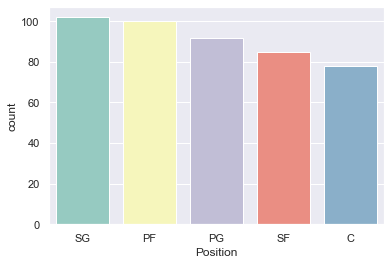

In [23]:
#בציר איקס יש לי את האינדקסים ובציר ווי יש לי את הכמות מופעים וזה מסודר בסדר יורד לפי האינדקסים
#ניתן לכתוב במוקם איקס ווי ואז זה יהיה לי מוצג מצד שמאל לימין
#palette="Set3"=משנה לי את הצבע
sns.set(style='darkgrid')
plt.figure(figsize=(6,4)) 
sns.countplot(x="Position", palette="Set3",data=basketball,order = basketball['Position'].value_counts().index)


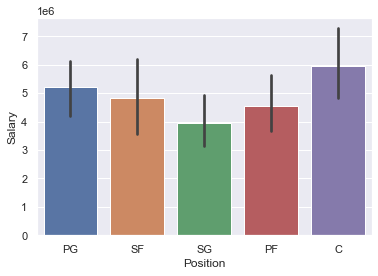

In [24]:
sns.barplot(x="Position", y="Salary" ,data= basketball)
plt.show()

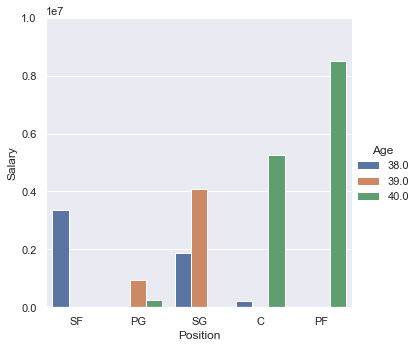

In [25]:
#מציג לי רק את הגיל 25 ביחס לעמדות בציר האיקס והשכר בציר הווי
age = basketball[basketball.loc[:,'Age'] > 37]
#hue=  הוא צובע לי ביחס לגילאים יש 3 גילאים לכן מחולק ל3 צבעים
# kind=אם אני לא אכתוב הוא יראה לי את זה בצורה של נקודות כאן אני מבקש ממנו  
sns.catplot(x="Position", y="Salary", kind="bar",hue='Age' ,data=age,ci=None)
#טווח של המספרים בציר ווי
plt.ylim(0,1.0*1e7)
plt.show()

# plot.scatter, scatterplot ,regplot 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


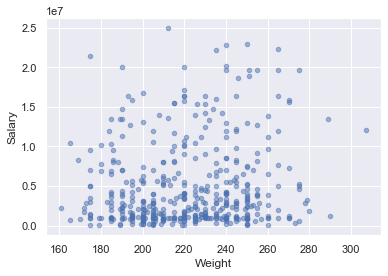

In [26]:
#מציג נקודות וקשר בין 2 משתנים
#מראה לי גרף פיזור
basketball.plot.scatter(x = 'Weight', y = 'Salary', alpha=0.5)

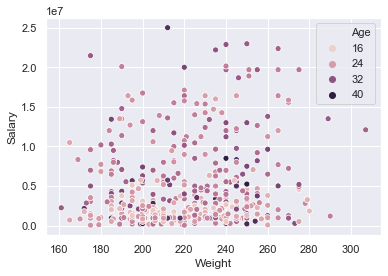

In [27]:
#עוד דרך הצגה
#hue=יוצר קורולציה על פי הגילאים וככה הוא מציג אותם כל גיל בצבע אחר
sns.scatterplot(data=basketball, x='Weight', y='Salary',hue="Age")

Text(0, 0.5, 'y values')

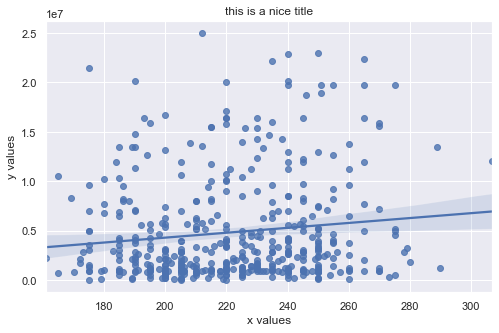

In [28]:
#מגדיל לי את התצוגה
plt.rcParams['figure.figsize'] = [8, 5]
#מציג קשר בין 2 משתנים עם קו לינארי
#גרף פיזור עם קו לינארי
sns.regplot(data=basketball, x='Weight', y='Salary')
#מוסיף לי כותרות
plt.title('this is a nice title')
#מוסיף לי יחידות לאיקס וווי
plt.xlabel('x values')
plt.ylabel('y values')

### boxplot
הקו הצהוב מראה את החציון 2 הקווים השחורים מייצגים את הטווח של המספרים העיגולים השחורים מייצגים את הנקודות החריגות 

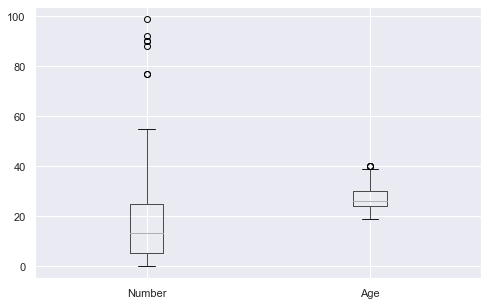

In [29]:
plt.figure(figsize=(8,5))
#להציג כמה עמודות 
basketball.boxplot(column=['Number','Age'])

[None, None, None, None, None, None, None, None, None, None]

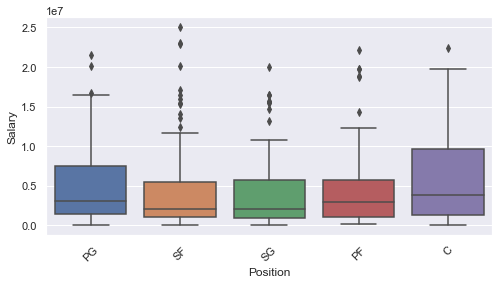

In [30]:
#בוקספלוט של העמדות בציר איקס ביחס לשכר בציר ווי
plt.figure(figsize=(8,4))
ax=sns.boxplot(x='Position', y='Salary', data=basketball);
#המלל בציר איקס באלכסון זה טוב כאשר יש לי מלל גדול ואז לפעמים הכיתוב יוצא אחד על השני
plt.setp(ax.get_xticklabels(), rotation=45)

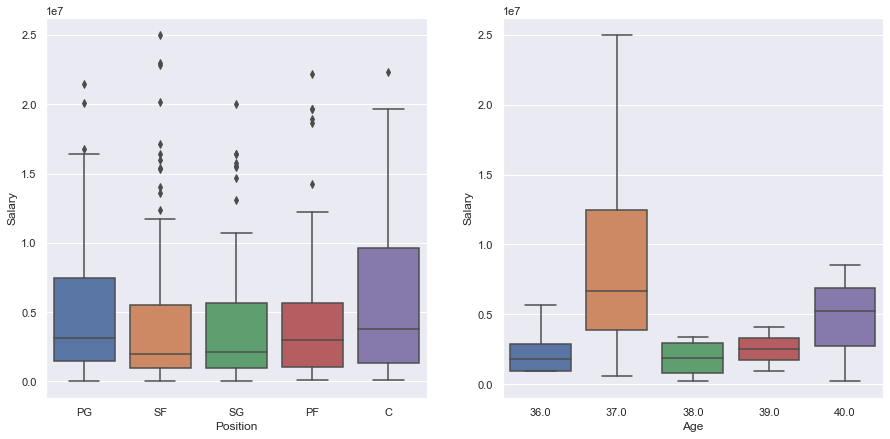

In [31]:
#הצגה של 2 בוקספלוטים במקביל
#מס 2 מייצג את הכמות גרפים 
fig, axes = plt.subplots(figsize=(15,7), ncols=2)
sns.boxplot(ax=axes[0], x='Position',y='Salary', data=basketball)
#הגדרתי שאני רוצה רק את הגילאים מעל גיל 35
age1=basketball.loc[basketball['Age'] > 35.0]
sns.boxplot(ax=axes[1], x='Age' ,y='Salary', data=age1)
plt.show()


 # פאי

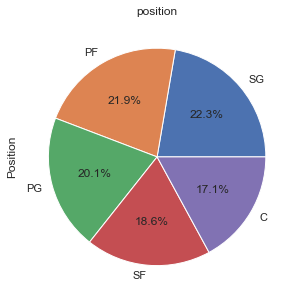

In [32]:
#הצגה בצורה של עוגה נציג רק כאשר יש פחות מ3 ערכים פה למשל זה לא טוב להציג ככה
plt.figure(1, figsize=(5,5))
plt.title("position")
basketball['Position'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

### 3. Heatmaps

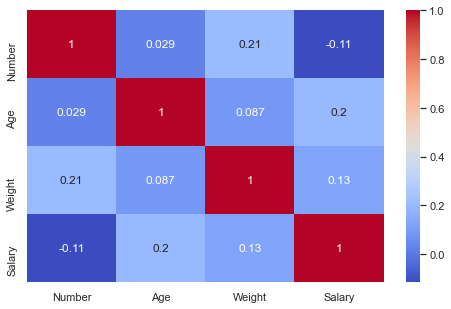

In [33]:
#יוצר קורולציות בין העמודות
#קובע לי תגודל
plt.figure(figsize=(8,5))
correlation_matrix = basketball.corr()
sns.heatmap(data=correlation_matrix,cmap='coolwarm', annot=True)

# קורולציות
מודדת את דרגת הקשר בין 2 משתנים אקראיים ככל שיותר קרוב ל1 או -1 הקשר יותר חזק

#סוגים שונים של קורולציות

In [34]:
basketball[['Weight', 'Salary','Age']].corr(method='pearson')

,Weight,Salary,Age
Weight,1.000000,0.125601,0.087183
Salary,0.125601,1.000000,0.201619
Age,0.087183,0.201619,1.000000


In [35]:
basketball.corr(method='pearson') 

,Number,Age,Weight,Salary
Number,1.000000,0.028724,0.206921,-0.114882
Age,0.028724,1.000000,0.087183,0.201619
Weight,0.206921,0.087183,1.000000,0.125601
Salary,-0.114882,0.201619,0.125601,1.000000


In [36]:
#נשתמש כאשר הנתונים לא מגיעים מהתפלגות נורמלית כאשר יש המון חריגים
basketball.corr(method='spearman') 

,Number,Age,Weight,Salary
Number,1.000000,0.008490,0.226084,-0.120310
Age,0.008490,1.000000,0.096163,0.250469
Weight,0.226084,0.096163,1.000000,0.111227
Salary,-0.120310,0.250469,0.111227,1.000000


In [37]:
basketball.corr(method='kendall') 

,Number,Age,Weight,Salary
Number,1.000000,0.005536,0.155850,-0.079304
Age,0.005536,1.000000,0.066130,0.163653
Weight,0.155850,0.066130,1.000000,0.075868
Salary,-0.079304,0.163653,0.075868,1.000000


# חיזוי
כאשר אני רוצה לעשות חיזוי על ערך שהוא לא מספרי אני צריך להמיר אותו למספרי אם הערך הוא בינארי אז נהפוך אותו לקטגורי אם הערך הוא לא בינארי נשתמש 
בפונקציה גט דאמיס

יש לי 2 סוגים של חיזוי רגרסור שאני משתמש בו כאשר המשתנים הם רציפים מחיר גובה גילאים וכו הסוג השני זה קלסיפייאר שזה כאשר אני רוצה לחזות משנים לא רציפים כמו מעשן לא מעשן או כמו חתוך עץ וכלב שאין בינהם קשר וכו

In [38]:
#מגדיר נתונים של העץ
features=['Weight','Age','Number','Height']
X=basketball1[features]
y=basketball1['Salary']
#יוצר חלוקה 70 אחוז אימון 30 אחוז מבחן
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=3)

#השתמשתי במודל של רגרסור שמטרתו לחזות משתנים עקביים כמו מחירים,שכר,גילאים
כאשר אני רוצה להגביל את עומק העץ , בזמן שאני יוצר את המודל להוסיף 

כאשר אני יוצר את המודל יש לי 3 אפשרויות :
# min_samples_leaf=
אורך העלה לדוגמא אם זה שווה 5 אז אם זה מכיל מתחת לחמש אל תחלק עוד את העץ כאן זה אחרי הפיצול
# Min samples split=
(מס הדגימות המינמאלי הדרוש לפיצול צומת)בנק פיצול אם זה פחות מחמש למשל אז אל תחלק עוד את העץ 
# max_depth=
מגביל לי את עומק העץ

In [39]:
#יוצר את המודל
basketball_modle= DecisionTreeRegressor(random_state=3)
#מאמן את המודל
basketball_modle.fit(X_train,y_train)
prediction2 = basketball_modle.predict(X_test) #בודק כמה העץ מנבא טוב
df = pd.DataFrame(columns = ['Salary', 'predictions']) #יוצר דאטה של 2 עמודות 
df['Salary'] = y_test #מכניס את התשובות האמיתיות
df = df.reset_index(drop=True)#רוצה שהמספרים יהיו לי יפה אחד אחרי השני 
df['predictions'] = pd.Series(prediction2)#מכניס את מה שניבאתי
df.head()#הצגה בטבלה של הנתונים המקוריים עם החיזוי

,Salary,predictions
0,206192.0,947276.0
1,222888.0,947276.0
2,1320000.0,947276.0
3,947276.0,200600.0
4,13400000.0,947276.0


פונקציה שמראה לי באיזה עומק יהיה החיזוי הכי טוב מה שהיא מציגה לי זה השגיאה הממוצעת בריבוע ככל שהשגיאה יותר קטנה החיזוי יותר טוב ומראה לי גם האם יש קשר בין מה שרציתי לחזות כאשר זה 0 זה אומר שהשורה המקורית ומה שרציתי לחזות הם לא אותו דבר וככל שזה עולה זה אומר שהם מתקרבים ואותו דבר 100 זה שזה בדיוק אותה תוצאה 

In [40]:
def eval(X_test,y_test,model1):
    pred = model1.predict(X_test)
    y_alt=y.values.reshape(-1,1)
    print("MSE: {:.3f}".format(mean_squared_error(pred,y_test,squared=False)))
    print("Acc: {:.3f}".format((pred == y_alt).mean())) 

In [41]:
for i in range(1,9):
    model2 = DecisionTreeRegressor(max_depth = i , random_state=1)
    model2.fit(X_train,y_train)
    print(i , eval(X_test,y_test,model2)) 

MSE: 5024596.901
Acc: 0.000
1 None
MSE: 5365392.431
Acc: 0.000
2 None
MSE: 5381503.082
Acc: 0.000
3 None
MSE: 5422437.163
Acc: 0.000
4 None
MSE: 5618714.124
Acc: 0.000
5 None
MSE: 5853668.605
Acc: 0.002
6 None
MSE: 5986285.261
Acc: 0.004
7 None
MSE: 6446906.373
Acc: 0.003
8 None


 # קובץ חדש  

In [42]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/iris.csv'
iris_df = pd.read_csv(url)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df[features]
y = iris_df['class']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=2) 

In [44]:
model2 = sk.tree.DecisionTreeClassifier(criterion="gini")
model2.fit(X_train,y_train)
prediction2 = model2.predict(X_test)
df = pd.DataFrame(columns = ['class', 'predictions'])
df['class'] = y_test
df = df.reset_index(drop=True)
df['predictions'] = pd.Series(prediction2)
df   
#בודק את רמת הדיוק של החיזוי כאן החיזוי גבוה
#נשתמש בזה רק בכלסייפאיר ברגרסור אי אפשר להשתמש בזה
#מקבל 2 דברים הראשון את מה שניבאתי השני את נתוני האמת
sk.metrics.accuracy_score(prediction2, y_test)

0.9555555555555556

פונקציה שמראה לי מה העומק המקסימלי של העץ

In [45]:
print("Depth:",model2.get_depth())

Depth: 4


#פונקציה שבונה מודל עד גבול מסוים הרעיון מאחורי זה לא ליצור עץ יותר מידי מורכב 

In [46]:
def get_acc(max_depth, train_X, test_X, train_y, test_y):
    model = sk.tree.DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    acc = sk.metrics.accuracy_score(preds_val, test_y)
    return(acc)

In [47]:
#כאן לולאה שרצה ובודקת את העומק רואים שכאן בעומק 3 זה הכי טוב 
for max_depth in [1, 2, 3,4,6,8]:
    my_acc = get_acc(max_depth, X_train, X_test, y_train, y_test)
    print(max_depth, my_acc)

1 0.6666666666666666
2 0.9555555555555556
3 0.9777777777777777
4 0.9555555555555556
6 0.9555555555555556
8 0.9555555555555556


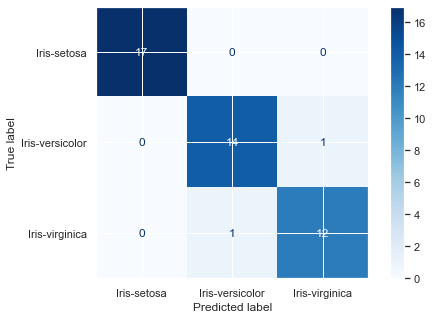

In [48]:
#ציר ציר איקס זה החיזוי ציר ווי זה הנתונים המקוריים המספר 17 מייצג לי שהתוצאה יצא אותו דבר המספר 1 בטבלה מייצג לי את הטעות מישהו שהיה מסוג מסויים בחיזוי יצא לו משהו אחר
sk.metrics.plot_confusion_matrix(model2, X_test, y_test, cmap=plt.cm.Blues)

# קובץ חדש

In [49]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/italy-covid-daywise.csv'
covid_df = pd.read_csv(url)
covid_df.tail()

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [50]:
covid_df.dtypes

date           object
new_cases     float64
new_deaths    float64
new_tests     float64
dtype: object

In [51]:
#נרצה להעביר את התאריך לסוג של דאטה טיים כדי שנוכל להשתמש בו אחרי כדי לעשות פילוחים בין חודשים ושנים
covid_df['date'] = pd.to_datetime(covid_df['date'])

In [52]:
#תרגול 4
#לוקח מהעמודה של התאריך ומחלק את התאריך לימים שבועות חודשים ושנים ומוסיף עמודה בנפרד
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [53]:
#בעזרת ההמרה ניתן עכשיו לגשת לזמנים ספציפיים לדוגמא כאן להציג רק את החודש השמיני בשנת 2020
covid_df_august = covid_df.loc[(covid_df.month == 8) & (covid_df.year == 2020)]
covid_df_august.head()

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
214,2020-08-01,379.0,9.0,31905.0,2020,8,1,5
215,2020-08-02,295.0,5.0,24496.0,2020,8,2,6
216,2020-08-03,238.0,8.0,13467.0,2020,8,3,0
217,2020-08-04,159.0,12.0,23491.0,2020,8,4,1
218,2020-08-05,190.0,5.0,29739.0,2020,8,5,2


In [54]:
#מציג לי את התאריך של היום
from datetime import date # get python datetime
now = pd.to_datetime(str(date.today()), format='%Y-%m-%d')
print("Today's date:")
print(now)

Today's date:
2021-06-13 00:00:00
